<a href="https://colab.research.google.com/github/aayush9753/LearningResources/blob/master/PyTorch/13_feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

In [2]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
if torch.cuda.is_available():
  print('yes')
else: print('cpu')

yes


In [4]:
# Hyper Parameter
input_size = 784 #28*28
hidden_size = 500
num_classes = 10 
num_epochs = 2
learning_rate = 0.001
batch_size = 100

In [5]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root ='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download = True)
test_dataset = torchvision.datasets.MNIST(root ='./data',
                                           train=False,
                                           transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
# DATA LOADER
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

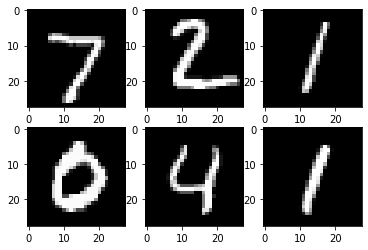

In [7]:
examples = iter(test_loader)
example_data , example_targets = examples.next() 
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0],cmap='gray')
plt.show()

In [8]:
#Fully Connected Neural Network with one hidden layer
class Neuralnet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(Neuralnet,self).__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    #no activation and softmax at the end
    return out

In [9]:
model = Neuralnet(input_size,hidden_size,num_classes).to(device)
model

Neuralnet(
  (l1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=500, out_features=10, bias=True)
)

In [10]:
#Loss and Optimization
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [12]:
#Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i , (images,labels) in enumerate(train_loader):
    #origin shape = [100,1,28,28]
    #resized = [100,784]
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    #Forward Pass
    outputs = model(images)
    loss = criterion(outputs,labels)
    
    #Backward Pass and Update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100 == 0 :
      print(f'Epoch = [{epoch+1}/{num_epochs}] , Step = [{i+1}/{n_total_steps} , Loss = {loss.item():.4f}] ')

Epoch = [1/2] , Step = [100/600 , Loss = 0.3688] 
Epoch = [1/2] , Step = [200/600 , Loss = 0.3511] 
Epoch = [1/2] , Step = [300/600 , Loss = 0.2168] 
Epoch = [1/2] , Step = [400/600 , Loss = 0.2587] 
Epoch = [1/2] , Step = [500/600 , Loss = 0.1350] 
Epoch = [1/2] , Step = [600/600 , Loss = 0.2713] 
Epoch = [2/2] , Step = [100/600 , Loss = 0.1523] 
Epoch = [2/2] , Step = [200/600 , Loss = 0.1270] 
Epoch = [2/2] , Step = [300/600 , Loss = 0.1661] 
Epoch = [2/2] , Step = [400/600 , Loss = 0.0837] 
Epoch = [2/2] , Step = [500/600 , Loss = 0.1374] 
Epoch = [2/2] , Step = [600/600 , Loss = 0.0792] 


In [48]:
#Test the model
#In test phase, we dont need to compute the gradients (for memory efficiancy)
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images , labels in test_loader:
    #origin shape = [100,1,28,28]
    #resized = [100,784]
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    #max returns (value,index)
    _,predicted = torch.max(outputs.data,1)
    n_samples += labels.size(0)
    n_correct += (predicted==labels).sum().item()

  acc = 100*n_correct/n_samples
  print(f'Accuracy on this 10000 test images is {acc}')

Accuracy on this 10000 test images is 97.32
